In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

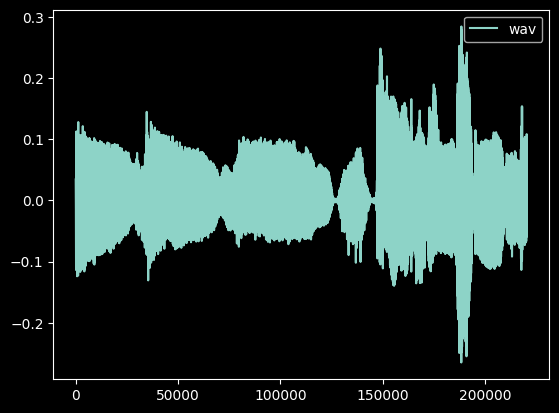

In [2]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Multitap Delay

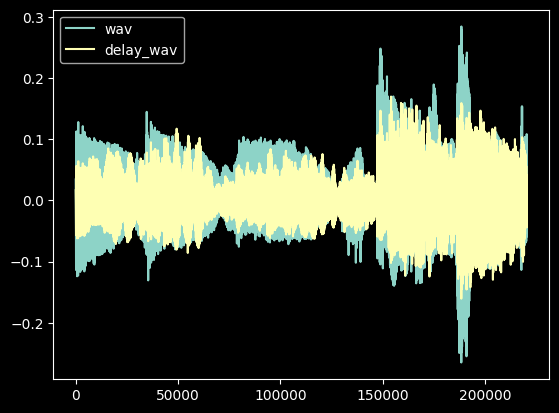

In [3]:
from diffFx_pytorch.processors.delay import MultiTapDelay      
DELAY_DSP_PARAMS = {
    '0_tap_delays_ms': 125.0,  # Eighth note at 120 BPM
    '0_tap_gains': 0.8,
    '1_tap_delays_ms': 250.0,  # Quarter note
    '1_tap_gains': 0.6,
    '2_tap_delays_ms': 375.0,  # Dotted quarter
    '2_tap_gains': 0.4,
    '3_tap_delays_ms': 500.0,  # Half note
    '3_tap_gains': 0.2,
    'mix': 0.5
}

Processor = MultiTapDelay(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
delay_wav = Processor(test_wav, None, DELAY_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=delay_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(delay_wav.squeeze().cpu().numpy(),      label='delay_wav')
plt.legend()